In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
train_df = pd.read_json(r"C:\Users\shvpr\Documents\notepad_files\train_recipe.json")
test_df = pd.read_json(r"C:\Users\shvpr\Documents\notepad_files\test_recipe.json")
train_len = len(train_df)
test_len = len(test_df)
print(f'train_size : {train_len} , test_size : {test_len}')

train_size : 39774 , test_size : 9944


In [15]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',500)
train_df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]"
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]"
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]"
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]"


In [16]:
test_df.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisins, milk, white sugar]"
1,28583,"[sugar, egg yolks, corn starch, cream of tartar, bananas, vanilla wafers, milk, vanilla extract, toasted pecans, egg whites, light rum]"
2,41580,"[sausage links, fennel bulb, fronds, olive oil, cuban peppers, onions]"
3,29752,"[meat cuts, file powder, smoked sausage, okra, shrimp, andouille sausage, water, paprika, hot sauce, garlic cloves, browning, lump crab meat, vegetable oil, all-purpose flour, freshly ground pepper, flat leaf parsley, boneless chicken skinless thigh, dried thyme, white rice, yellow onion, ham]"
4,35687,"[ground black pepper, salt, sausage casings, leeks, parmigiano reggiano cheese, cornmeal, water, extra-virgin olive oil]"


In [17]:
train_df.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [18]:
test_df.isnull().sum()

id             0
ingredients    0
dtype: int64

In [19]:
train_df=train_df.drop(['id'],axis=1)


In [20]:
test_df=test_df.drop(['id'],axis=1)

In [21]:
train_df.head()

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]"
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]"
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]"
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]"


In [22]:
#train_df['category_id'] = train_df['cuisine'].factorize()[0]

In [23]:
train_df['category_id'] = train_df['cuisine'].factorize()[0]
category_id_df = train_df[['cuisine', 'category_id']].drop_duplicates().sort_values('category_id')


In [24]:
category_to_id = dict(category_id_df.values)
print(category_to_id)

{'greek': 0, 'southern_us': 1, 'filipino': 2, 'indian': 3, 'jamaican': 4, 'spanish': 5, 'italian': 6, 'mexican': 7, 'chinese': 8, 'british': 9, 'thai': 10, 'vietnamese': 11, 'cajun_creole': 12, 'brazilian': 13, 'french': 14, 'japanese': 15, 'irish': 16, 'korean': 17, 'moroccan': 18, 'russian': 19}


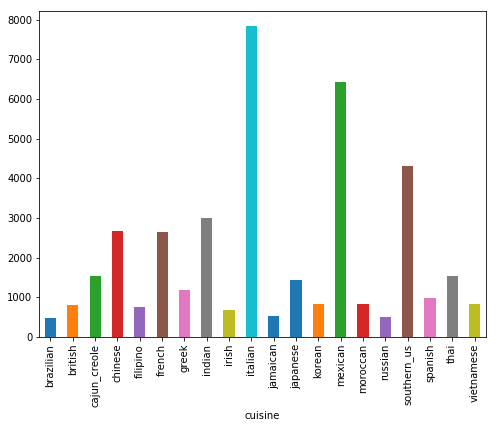

In [25]:
# Looking at how the output data looks
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
train_df.groupby('cuisine').ingredients.count().plot.bar()
plt.show()


In [26]:
train_df.head(20)

,cuisine,ingredients,category_id
0,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]",0
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]",1
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]",2
3,indian,"[water, vegetable oil, wheat, salt]",3
4,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]",3
5,jamaican,"[plain flour, sugar, butter, eggs, fresh ginger root, salt, ground cinnamon, milk, vanilla extract, ground ginger, powdered sugar, baking powder]",4
6,spanish,"[olive oil, salt, medium shrimp, pepper, garlic, chopped cilantro, jalapeno chilies, flat leaf parsley, skirt steak, white vinegar, sea salt, bay leaf, chorizo sausage]",5
7,italian,"[sugar, pistachio nuts, white almond bark, flour, vanilla extract, olive oil, almond extract, eggs, baking powder, dried cranberries]",6
8,mexican,"[olive oil, purple onion, fresh pineapple, pork, poblano peppers, corn tortillas, cheddar cheese, ground black pepper, salt, iceberg lettuce, lime, jalapeno chilies, chopped cilantro fresh]",7
9,italian,"[chopped tomatoes, fresh basil, garlic, extra-virgin olive oil, kosher salt, flat leaf parsley]",6


In [27]:
# combines the list of ingredients into one single string.
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text'''
    combined_text = " ".join(list_of_text)
    return combined_text

In [28]:
train_df['ingredients']=train_df['ingredients'].apply(combine_text)

In [29]:
test_df['ingredients']=test_df['ingredients'].apply(combine_text)

In [30]:
test_df['ingredients'][0]

'baking powder eggs all-purpose flour raisins milk white sugar'

In [31]:
train_df.shape

(39774, 3)

In [32]:
test_df.shape

(9944, 1)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',sublinear_tf=True,stop_words='english',ngram_range=(1,1))
tfidf_data=tfidf.fit_transform(train_df['ingredients'])
data_dtm=pd.DataFrame(tfidf_data.toarray(),columns=tfidf.get_feature_names())
features = tfidf.get_feature_names()

In [34]:
data_dtm = data_dtm.drop(['00','10','100','14','15','25','33','40','43','95','96'],axis=1)

In [35]:
data_dtm.head()

,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,ackee,acorn,acting,activ,active,added,adobo,adzuki,agar,agave,age,aged,ahi,ai,aioli,ajinomoto,ajwain,aka,alaskan,albacore,alcohol,ale,aleppo,alexia,alfalfa,alfredo,allspice,almond,almondmilk,almonds,aloe,alphabet,alum,amaranth,amarena,amaretti,amaretto,amba,amber,amberjack,...,winter,wish,wok,woksaus,wolf,wolfberries,won,wondra,wonton,wood,woods,worcestershire,world,wrappers,wraps,xanthan,xuxu,yaki,yakisoba,yam,yams,yardlong,yeast,yellow,yellowfin,yellowtail,yoghurt,yogurt,yolk,yolks,yoplait,yoplaitâ,york,young,yu,yuca,yucca,yukon,yum,yuzu,yuzukosho,za,zatarains,zatarainâ,zero,zest,zesty,zinfandel,ziti,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286325,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223944,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.194519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# writing the top ten ingredients with TFIDF weights occuring in a descending manner to the top_dict.
data_dtm_transposed = data_dtm.transpose()
top_dict={}
for c in data_dtm_transposed.columns:
    top = data_dtm_transposed[c].sort_values(ascending=False).head(10)
    top_dict[c] = list(zip(top.index,top.values))

In [39]:
top_dict[1]

[('meal', 0.4152359520427021),
 ('plain', 0.35484248395407475),
 ('tomatoes', 0.3203348802667285),
 ('yellow', 0.2863254445243474),
 ('thyme', 0.28108031626883806),
 ('ground', 0.2631717298077314),
 ('corn', 0.22749219361739603),
 ('vegetable', 0.2196966125585974),
 ('milk', 0.2184056885419303),
 ('pepper', 0.21537237055192993)]

In [40]:
words=[]
for c in data_dtm_transposed.columns:
    top = [word for (word,value) in top_dict[c]]
    for t in top:
        words.append(t)

In [25]:
# finding the most frequently occuring ingredients.
from collections import Counter
Counter(words).most_common()


[('flour', 3296),
 ('cheese', 3082),
 ('sugar', 2815),
 ('fresh', 2645),
 ('sauce', 2591),
 ('chicken', 2453),
 ('ground', 2385),
 ('water', 2337),
 ('lemon', 2304),
 ('pepper', 2258),
 ('milk', 2237),
 ('purpose', 2205),
 ('powder', 2194),
 ('eggs', 2176),
 ('butter', 2140),
 ('white', 2090),
 ('cream', 2076),
 ('lime', 2071),
 ('large', 2063),
 ('chopped', 2029),
 ('salt', 2012),
 ('baking', 1880),
 ('dried', 1846),
 ('soy', 1839),
 ('juice', 1835),
 ('green', 1832),
 ('florets', 1773),
 ('parmesan', 1751),
 ('vinegar', 1697),
 ('vegetable', 1684),
 ('virgin', 1683),
 ('red', 1669),
 ('sesame', 1669),
 ('leaves', 1652),
 ('unsalted', 1629),
 ('zucchini', 1622),
 ('corn', 1614),
 ('chili', 1609),
 ('rice', 1607),
 ('flakes', 1593),
 ('bell', 1569),
 ('parsley', 1562),
 ('olive', 1560),
 ('potatoes', 1552),
 ('beef', 1544),
 ('basil', 1539),
 ('flounder', 1519),
 ('wine', 1507),
 ('cheddar', 1502),
 ('black', 1498),
 ('tomatoes', 1497),
 ('bread', 1493),
 ('oil', 1481),
 ('vanilla', 14

In [43]:
#In the above data we see some words like bought,store,tablespoons,festive..etc add no meaning to the ingredients
# adding these words to stopwords again...
stop_list=['tablespoons','teaspoon','festive','ounce','ounces','lbs','use','inch','purpose','low','cup','like',
           'small','large','heavy','used','fav','substitute','temperature','removed','cups','finely','optional',
           'bunch','style','ml','old','lengthwise','prefer','needed','flat','refrigerated','quarts','lb',
          'stick','inches','separated','quart','active','just','feel','make','depending','using',
          'original','kg','want','real','great','approx','bought','type','double','note','tbsp','called',
          'approximately','new','paper','fast','directions','ears','angel','quarters','according',
          'gallon','leftover','left','cover','leave','cm','liter','available','recommended','diagonally',
          'equal','variety','minutes','total','usually','adjust','try','remove','nutritional','including',
          'aluminium','sec','equivalent','sure','simply','possible','day','really','fully','won','store','bought','bottled','table',
          'ready','rocket','won','gram']

In [44]:
# update our document form matrix
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Add new stop words
stopwords = text.ENGLISH_STOP_WORDS.union(stop_list)

# recreate document term matrix
tfidf1 = TfidfVectorizer(stop_words=stopwords,sublinear_tf=True,ngram_range=(1,2))
features = tfidf1.fit_transform(train_df['ingredients'])
labels = train_df['category_id']
#data_stop=pd.DataFrame(tfidf_data.toarray(),columns=tfidf1.get_feature_names())
#data_stop.index=train_df.index


In [45]:
features.shape

(39774, 79595)

In [29]:
# performing chi2 test and getting the indices of the most correlated unigrams and bigrams in a recipe.
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for cuisine, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf1.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(cuisine))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'brazilian':
  . Most correlated unigrams:
. ai
. aã
. cachaca
  . Most correlated bigrams:
. lime cachaca
. sugar cachaca
. cachaca lime
# 'british':
  . Most correlated unigrams:
. mincemeat
. suet
. stilton
  . Most correlated bigrams:
. golden syrup
. stilton cheese
. beef drippings
# 'cajun_creole':
  . Most correlated unigrams:
. andouille
. creole
. cajun
  . Most correlated bigrams:
. andouille sausage
. creole seasoning
. cajun seasoning
# 'chinese':
  . Most correlated unigrams:
. sesame
. chinese
. soy
  . Most correlated bigrams:
. corn starch
. sesame oil
. soy sauce
# 'filipino':
  . Most correlated unigrams:
. peppercorn
. lumpia
. calamansi
  . Most correlated bigrams:
. cooking oil
. lumpia wrappers
. calamansi juice
# 'french':
  . Most correlated unigrams:
. tarragon
. gruyere
. yolks
  . Most correlated bigrams:
. unsalted butter
. gruyere cheese
. egg yolks
# 'greek':
  . Most correlated unigrams:
. greek
. crumbles
. feta
  . Most correlated bigrams:
. greek sea

In [30]:
# Using MultinomialNB to create the model and train.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
stopwords = text.ENGLISH_STOP_WORDS.union(stop_list)
#count_vect = CountVectorizer(analyzer='word',stop_words=stopwords,ngram_range=(1,2))
#X_train_counts = count_vect.fit_transform(train_df['ingredients'])
tfidf = TfidfVectorizer(analyzer='word',stop_words=stopwords,ngram_range=(1,2),sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(train_df['ingredients'])
y_train= train_df['cuisine']
clf = MultinomialNB().fit(features, y_train)

In [31]:
print(clf.predict(tfidf.transform(['baking powder eggs all-purpose flour raisins milk white sugar'])))

['southern_us']


In [32]:
predicted = clf.predict(tfidf.transform(test_df['ingredients']))

In [33]:
predicted

array(['southern_us', 'southern_us', 'italian', ..., 'italian', 'mexican',
       'mexican'], dtype='<U12')

In [34]:
len(predicted)

9944

In [35]:
len(test_df)

9944

In [36]:
# saved the file in my documents.
np.savetxt(r'C:\Users\shvpr\Documents\my_submission.csv',predicted,delimiter=",",fmt='%s')

In [ ]:
#clf.score()

In [6]:
# Etracting the data from the scraped data in the JSON file to the data dictionary.
import json
with open(r"C:\Users\shvpr\Documents\notepad_files\new_scraped_data.json", mode='r', encoding='utf-8') as f:
    feeds=json.load(f)
    def remove_error_info(d):
        if not isinstance(d, (dict, list)):
            return d
        if isinstance(d, list):
            return [remove_error_info(v) for v in d]
    return {k: remove_error_info(v) for k, v in d.items()
            if k not in {'ingredient_quantities', 'recipe_time','servings','yields','units','Serving_Size',
                        'Servings_Per_Recipe','Amt_per_serving','Daily_Percentile_value','url','directions','recipe_title'}}



data = remove_error_info(feeds)



NameError: name 'd' is not defined

In [5]:
# Extracting only the new_ingredients key and corresponding values from the JSON file.
data_dict={}
lt=[]
for i,c in enumerate(data):
    for key,value in c.items():
        if key=="new_ingredients":
            data_dict[str(i)]=c[key]
    lt.append(c['recipe_titles'])
            
    

NameError: name 'data' is not defined

In [60]:
# recipe titles are stored in the list lt.
len(lt)

20914

In [53]:
# converting the data_dict into pandas series object.
df = pd.Series(data_dict)

In [54]:
df.head()

0                                                                                                                                            [cup water, teaspoon cider vinegar, tablespoon margarine, tablespoons sugar, teaspoon salt, teaspoon dried onion flakes, teaspoon caraway seed, tablespoons unsweetened cocoa, cups flour, cup rye flour, cup oat bran, teaspoon yeast]
1                                                                                                                                                                                                                                                                                                                         [cardamom pods lightly bruised, g ground coffee, lt water]
2                                                                                                                                                                                                                        [lb dried lentils, tablespoons red wi

In [55]:
df=df.apply(combine_text)

In [56]:
df.head()

0                                                                                                                                             cup water teaspoon cider vinegar tablespoon margarine tablespoons sugar teaspoon salt teaspoon dried onion flakes teaspoon caraway seed tablespoons unsweetened cocoa cups flour cup rye flour cup oat bran teaspoon yeast
1                                                                                                                                                                                                                                                                                                                 cardamom pods lightly bruised g ground coffee lt water
2                                                                                                                                                                                                                    lb dried lentils tablespoons red wine vinegar tablespoons olive o

In [57]:
predicted_recipe = clf.predict(tfidf.transform(df))

In [58]:
predicted_recipe

array(['southern_us', 'indian', 'italian', ..., 'southern_us', 'italian',
       'italian'], dtype='<U12')

In [59]:
len(predicted_recipe)

20914

In [61]:
recipe_titles = np.array(lt)

In [64]:
recipe_df=pd.DataFrame({'recipe_titles':recipe_titles,'predicted_recipe':predicted_recipe})

In [65]:
len(recipe_df)

20914

In [68]:
# writing the dataframe into the cs file.
recipe_df.to_csv(r"C:\Users\shvpr\Documents\recipe_prediction.csv",index= False,columns=['recipe_titles','predicted_recipe'],header=True)